In [1]:
import os

In [2]:
%pwd

'E:\\GAN for Face expression Classification\\iteration 3\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'E:\\GAN for Face expression Classification\\iteration 3'

In [5]:
import logging
from pathlib import Path
logging.basicConfig(
    # filename='extract_data.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [7]:
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras. layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop

In [8]:
from sklearn.model_selection import train_test_split
import os
from pathlib import Path

In [9]:
dataset_dir = Path(os.getcwd()) / r"dataset\archive\images_processed"

In [10]:
picture_size = 156

In [11]:
batch_size  = 128
datagen_train  = ImageDataGenerator()


In [12]:
file_paths = []
labels = []

for class_name in os.listdir(dataset_dir):
    class_dir = dataset_dir / class_name
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            file_paths.append(str(class_dir / file_name))
            labels.append(class_name)


In [13]:
data = pd.DataFrame({'file_path': file_paths, 'label': labels})


In [14]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [15]:
train_generator = datagen_train.flow_from_dataframe(
    dataframe=train_data,
    x_col='file_path',
    y_col='label',
    target_size=(picture_size, picture_size),
    color_mode="rgb",  # Change color mode to "rgb"
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 121 validated image filenames belonging to 8 classes.


In [16]:


def log_dataset_info(dataset):
   
    # Check if the input is train_set or test_set
    if 'train' in str(dataset).lower():
        dataset_type = "Train Set"
    elif 'test' in str(dataset).lower():
        dataset_type = "Test Set"
    else:
        dataset_type = "Dataset"

    # Log dataset information
    logging.info(f"{dataset_type} Information:")
    class_labels = sorted(dataset.class_indices.items(), key=lambda x: x[1])
    for label, index in class_labels:
        num_images = len([x for x in dataset.labels if x == index])
        logging.info(f"Class '{label}' (index {index}): {num_images} images")

In [17]:
log_dataset_info(train_generator)

2024-05-04 03:55:22 - INFO - Dataset Information:
2024-05-04 03:55:22 - INFO - Class 'anger' (index 0): 15 images
2024-05-04 03:55:22 - INFO - Class 'contempt' (index 1): 14 images
2024-05-04 03:55:22 - INFO - Class 'disgust' (index 2): 17 images
2024-05-04 03:55:22 - INFO - Class 'fear' (index 3): 14 images
2024-05-04 03:55:22 - INFO - Class 'happy' (index 4): 16 images
2024-05-04 03:55:22 - INFO - Class 'neutral' (index 5): 15 images
2024-05-04 03:55:22 - INFO - Class 'sad' (index 6): 16 images
2024-05-04 03:55:22 - INFO - Class 'surprised' (index 7): 14 images


In [18]:
test_generator = datagen_train.flow_from_dataframe(
    dataframe=test_data,
    x_col='file_path',
    y_col='label',
    target_size=(picture_size, picture_size),
    color_mode="rgb",  # Change color mode to "rgb"
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 31 validated image filenames belonging to 8 classes.


In [19]:
log_dataset_info(test_generator)

2024-05-04 03:55:22 - INFO - Dataset Information:
2024-05-04 03:55:22 - INFO - Class 'anger' (index 0): 4 images
2024-05-04 03:55:22 - INFO - Class 'contempt' (index 1): 5 images
2024-05-04 03:55:22 - INFO - Class 'disgust' (index 2): 2 images
2024-05-04 03:55:22 - INFO - Class 'fear' (index 3): 5 images
2024-05-04 03:55:22 - INFO - Class 'happy' (index 4): 3 images
2024-05-04 03:55:22 - INFO - Class 'neutral' (index 5): 4 images
2024-05-04 03:55:22 - INFO - Class 'sad' (index 6): 3 images
2024-05-04 03:55:22 - INFO - Class 'surprised' (index 7): 5 images


In [20]:
# Wrap the generators with a custom infinite generator
def infinite_generator(generator):
    while True:
        for batch in generator:
            yield batch

train_set = infinite_generator(train_generator)
test_set = infinite_generator(test_generator)

In [21]:
from math import ceil
steps_per_epoch = ceil(len(train_data) / batch_size)
validation_steps = ceil(len(test_data) / batch_size)

In [22]:
from keras.optimizers import Adam,SGD,RMSprop

# Alex Net

In [23]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Add, Conv2D, DepthwiseConv2D, SeparableConv2D
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, ZeroPadding2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Activation, LeakyReLU
import keras.backend as K
from tensorflow.keras.regularizers import l2
from time import time
import numpy as np

In [24]:
input_shape = 156, 156, 3
n_classes = 8

In [25]:
def alexnet(input_shape, n_classes):
    input = Input(input_shape)

    x = Conv2D(96, 11, strides=4, padding="same", activation="relu", kernel_regularizer=l2(0.01))(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)

    x = Conv2D(256, 5, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)

    x = Conv2D(384, 3, strides=1, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Conv2D(384, 3, strides=1, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, 3, strides=1, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)

    x = Flatten()(x)
    x = Dense(4096, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dense(4096, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model

input_shape = 156, 156, 3  # Adjusted input shape
n_classes = 8

model = alexnet(input_shape, n_classes)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 156, 156, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 39, 39, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 39, 39, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 19, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 19, 19, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 19, 19, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 9, 9, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 9, 9, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 9, 9, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 9, 9, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 9, 9, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4096)                │          16,384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 37,380,872 (142.60 MB)

 Trainable params: 37,361,736 (142.52 MB)

 Non-trainable params: 19,136 (74.75 KB)

In [26]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [27]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=validation_steps,
                    callbacks=callbacks_list 
)

model.save(Path(os.getcwd()) / "model/Alexnet" / "Alexnet_model.h5")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.1240 - loss: 96.4509 - val_accuracy: 0.1613 - val_loss: 298.5938 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2562 - loss: 99.6913 - val_accuracy: 0.0968 - val_loss: 533.3573 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1488 - loss: 100.8146 - val_accuracy: 0.0968 - val_loss: 1076.0182 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2645 - loss: 99.6266
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.2645 - loss: 99.6266 - val_accuracy: 0.1290 - val_loss: 1475.8795 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.2727 - loss: 94.9050 - val_accuracy: 0.1290 - val_loss: 1153.6405 - learning_rate: 2.0000e-04
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.4380 - loss: 92.4342 - val_accura

2024-05-04 03:57:45 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


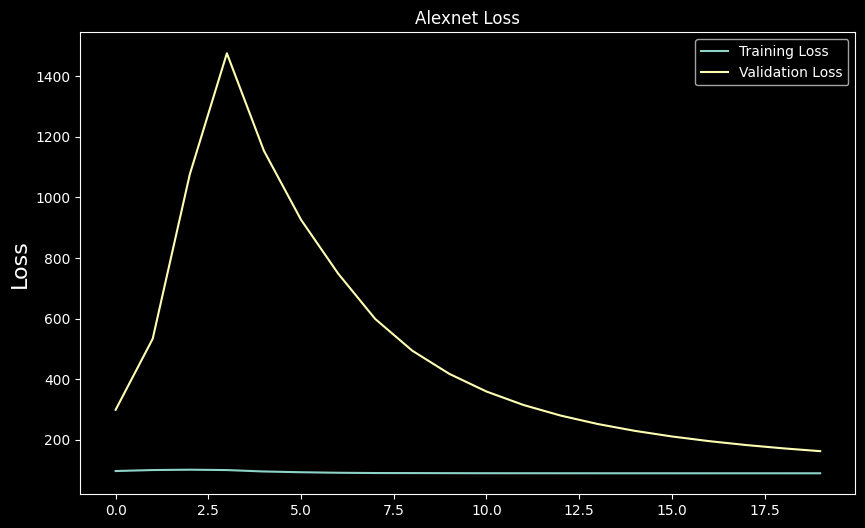

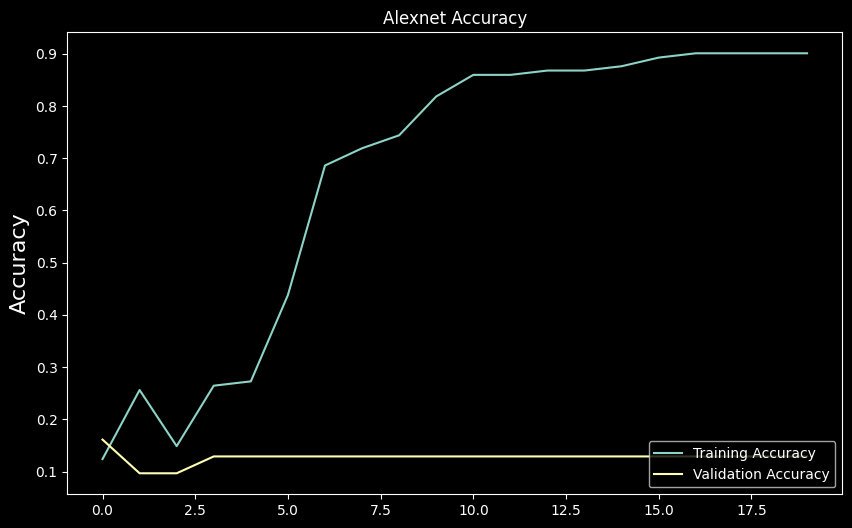

In [28]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "Alexnet"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Alexnet Loss')
plt.savefig(plots_path / "Alexnet_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Alexnet Accuracy')
plt.savefig(plots_path / "Alexnet_Accuracy.png")
plt.show()


# VGG16

In [29]:
# VGG16

def vgg16(input_shape, n_classes, l2_reg=0.01):
    input = Input(input_shape)

    # Block 1
    x = Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(input)
    x = BatchNormalization()(x)
    x = Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    # Block 2
    x = Conv2D(128, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    # Block 3
    x = Conv2D(256, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    # Block 4
    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    # Block 5
    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    # Dense layers
    x = Flatten()(x)
    x = Dense(4096, activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Add dropout layer
    x = Dense(4096, activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Add dropout layer

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model


model = vgg16(input_shape, n_classes)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 156, 156, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 156, 156, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 156, 156, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 156, 156, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 156, 156, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 78, 78, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 78, 78, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 78, 78, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 78, 78, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 78, 78, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 39, 39, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 39, 39, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 39, 39, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 39, 39, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 39, 39, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 39, 39, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 39, 39, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 256)         │              

 Total params: 84,011,336 (320.48 MB)

 Trainable params: 83,986,504 (320.38 MB)

 Non-trainable params: 24,832 (97.00 KB)

In [30]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [31]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=validation_steps,
                    callbacks=callbacks_list
)

model.save(Path(os.getcwd()) / "model/vgg16"/ "vgg16_model.h5")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 45s 45s/step - accuracy: 0.0992 - loss: 145.0495 - val_accuracy: 0.0968 - val_loss: 155.8591 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - accuracy: 0.2149 - loss: 144.4438 - val_accuracy: 0.0968 - val_loss: 422.3938 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.1818 - loss: 144.9344 - val_accuracy: 0.0968 - val_loss: 1204.4475 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.2893 - loss: 143.7337
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.2893 - loss: 143.7337 - val_accuracy: 0.0968 - val_loss: 9478.3145 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.2975 - loss: 143.4531 - val_accuracy: 0.0968 - val_loss: 8856.5283 - learning_rate: 2.0000e-04
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.3884 - loss: 14

2024-05-04 04:03:02 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


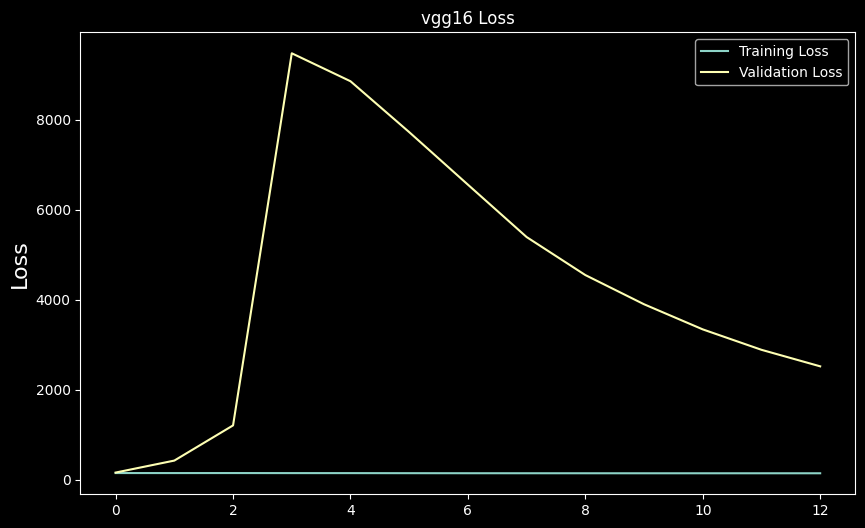

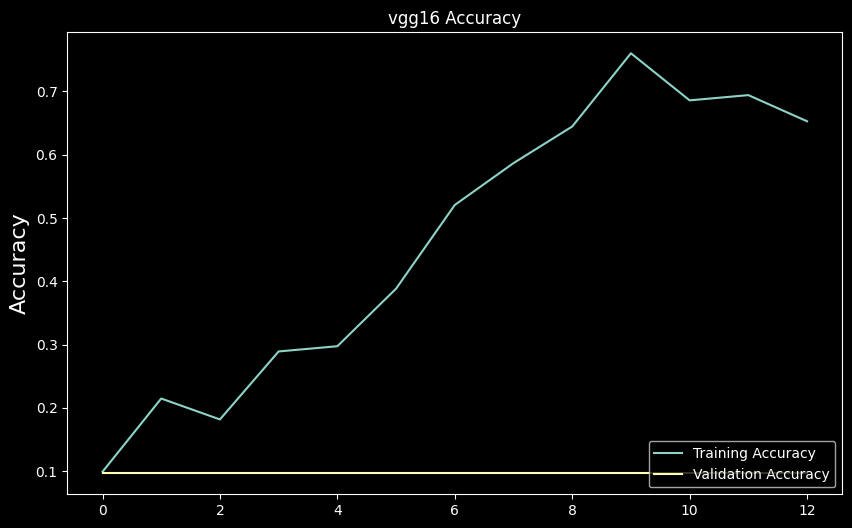

In [32]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "vgg16"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('vgg16 Loss')
plt.savefig(plots_path / "vgg16_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('vgg16 Accuracy')
plt.savefig(plots_path / "vgg16_Accuracy.png")
plt.show()


# vgg19


In [33]:
# vgg19


def vgg19(input_shape, n_classes, l2_reg=0.01):
    input = Input(input_shape)

    x = Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(input)
    x = Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(128, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = Conv2D(128, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(256, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = Conv2D(256, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = Conv2D(256, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = Conv2D(256, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Flatten()(x)
    x = Dense(4096, activation="relu", kernel_regularizer=l2(l2_reg))(x)
    x = Dense(4096, activation="relu", kernel_regularizer=l2(l2_reg))(x)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model

model = vgg19(input_shape, n_classes)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 156, 156, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 156, 156, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 156, 156, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 78, 78, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 78, 78, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 78, 78, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 39, 39, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 39, 39, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 39, 39, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 39, 39, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 39, 39, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 20, 20, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 20, 20, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 20, 20, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 20, 20, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 10, 10, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 89,271,368 (340.54 MB)

 Trainable params: 89,271,368 (340.54 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [35]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=validation_steps,
                    callbacks=callbacks_list
)

model.save(Path(os.getcwd()) / "model/vgg19"/ "vgg19_model.h5")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - accuracy: 0.1322 - loss: 156.5478 - val_accuracy: 0.0968 - val_loss: 270.4468 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.1322 - loss: 259.9512 - val_accuracy: 0.0968 - val_loss: 127.1751 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.1322 - loss: 127.1895 - val_accuracy: 0.0968 - val_loss: 116.8002 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.1322 - loss: 116.8183
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.1322 - loss: 116.8183 - val_accuracy: 0.0968 - val_loss: 107.4441 - learning_rate: 0.0010
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


2024-05-04 04:04:31 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


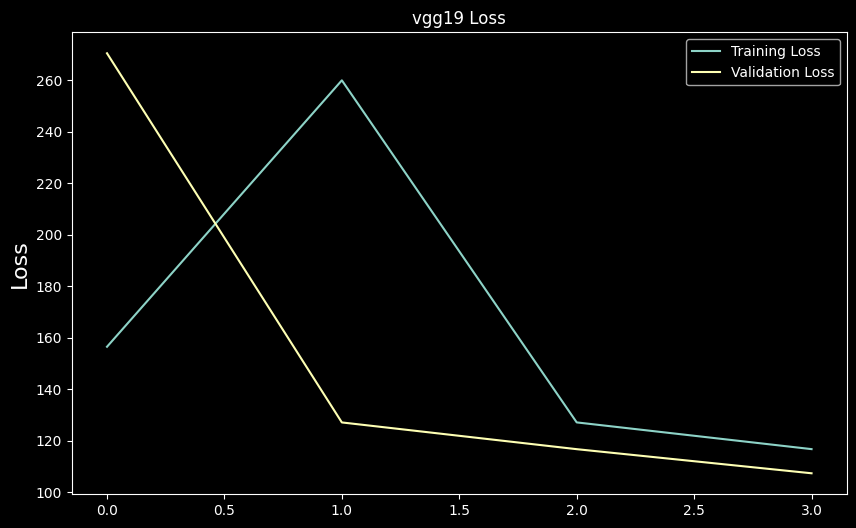

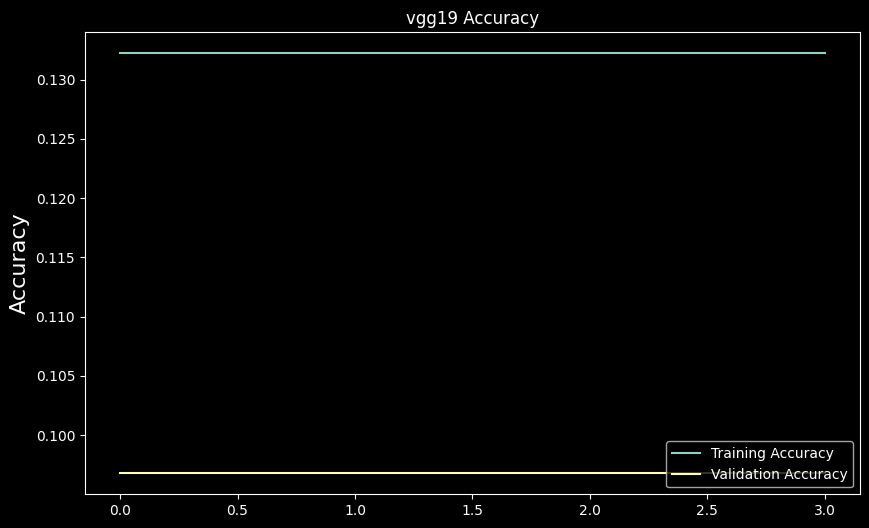

In [36]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "vgg19"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('vgg19 Loss')
plt.savefig(plots_path / "vgg19_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('vgg19 Accuracy')
plt.savefig(plots_path / "vgg19_Accuracy.png")
plt.show()


# Densenet121

In [37]:
# DenseNet121


def densenet121(img_shape, n_classes, f=32):
    repetitions = (6, 12, 24, 16)

    def bn_rl_conv(x, f, k=1, s=1, p="same"):
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(f, k, strides=s, padding=p, kernel_regularizer=l2(0.01))(x)
        return x

    def dense_block(tensor, r):
        for _ in range(r):
            x = bn_rl_conv(tensor, 4 * f)
            x = bn_rl_conv(x, f, 3)
            tensor = Concatenate()([tensor, x])
        return tensor

    def transition_block(x):
        x = bn_rl_conv(x, int(x.shape[-1]) // 2)
        x = BatchNormalization()(x)
        x = AvgPool2D(2, strides=2, padding="same")(x)
        return x

    input = Input(img_shape)
    x = Conv2D(64, 7, strides=2, padding="same", kernel_regularizer=l2(0.01))(input)
    x = BatchNormalization()(x)
    x = AvgPool2D(3, strides=2, padding="same")(x)

    for r in repetitions:
        d = dense_block(x, r)
        x = transition_block(d)

    x = GlobalAvgPool2D()(d)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Add dropout layer
    output = Dense(n_classes, activation="softmax", kernel_regularizer=l2(0.01))(x)

    model = Model(input, output)
    return model

model = densenet121(input_shape, n_classes)
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 156, 156, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_34 (Conv2D)            │ (None, 78, 78, 64)        │           9,472 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_22        │ (None, 78, 78, 64)        │             256 │ conv2d_34[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ average_pooling2d             │ (None, 39, 39, 64)        │               0 │ batch_normalization_22[0]… │
│ (AveragePooling2D)            │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_23        │ (None, 39, 39, 64)        │             256 │ average_pooling2d[0][0]    │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu (ReLU)                  │ (None, 39, 39, 64)        │               0 │ batch_normalization_23[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_35 (Conv2D)            │ (None, 39, 39, 128)       │           8,320 │ re_lu[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_24        │ (None, 39, 39, 128)       │             512 │ conv2d_35[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_1 (ReLU)                │ (None, 39, 39, 128)       │               0 │ batch_normalization_24[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_36 (Conv2D)            │ (None, 39, 39, 32)        │          36,896 │ re_lu_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 39, 39, 96)        │               0 │ average_pooling2d[0][0],   │
│                               │                           │                 │ conv2d_36[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_25        │ (None, 39, 39, 96)        │             384 │ concatenate[0][0]          │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_2 (ReLU)                │ (None, 39, 39, 96)        │               0 │ batch_normalization_25[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_37 (Conv2D)            │ (None, 39, 39, 128)       │          12,416 │ re_lu_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 7,059,528 (26.93 MB)

 Trainable params: 6,974,088 (26.60 MB)

 Non-trainable params: 85,440 (333.75 KB)

In [38]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [39]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=validation_steps,
                    callbacks=callbacks_list
)

model.save(Path(os.getcwd()) / "model/densenet121"/ "densenet121_model.h5")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 84s 84s/step - accuracy: 0.1074 - loss: 158.6029 - val_accuracy: 0.0645 - val_loss: 182.1696 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.1405 - loss: 159.4495 - val_accuracy: 0.1613 - val_loss: 175.7944 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.1901 - loss: 156.2622 - val_accuracy: 0.1613 - val_loss: 170.9837 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.2149 - loss: 154.4836 - val_accuracy: 0.1613 - val_loss: 186.8528 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.1818 - loss: 153.0996
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.1818 - loss: 153.0996 - val_accuracy: 0.1613 - val_loss: 205.4802 - learning_rate: 0.0010
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.1736 - loss: 151.0363 

2024-05-04 04:07:51 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


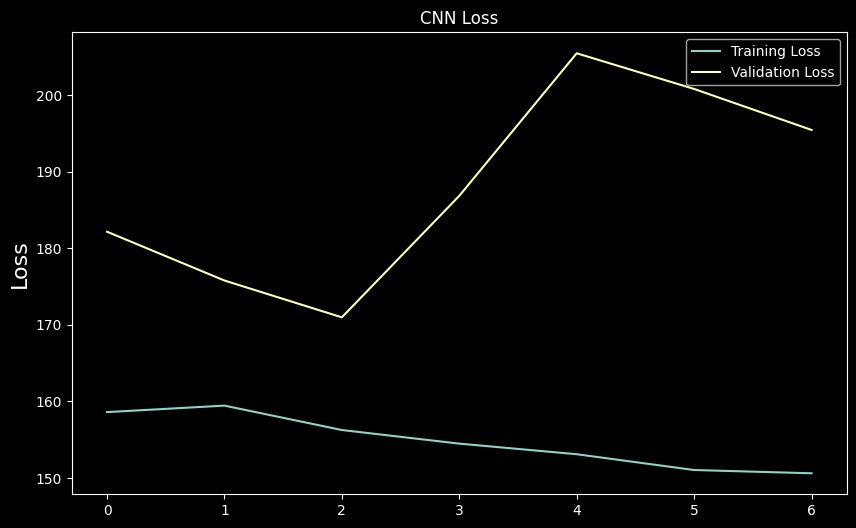

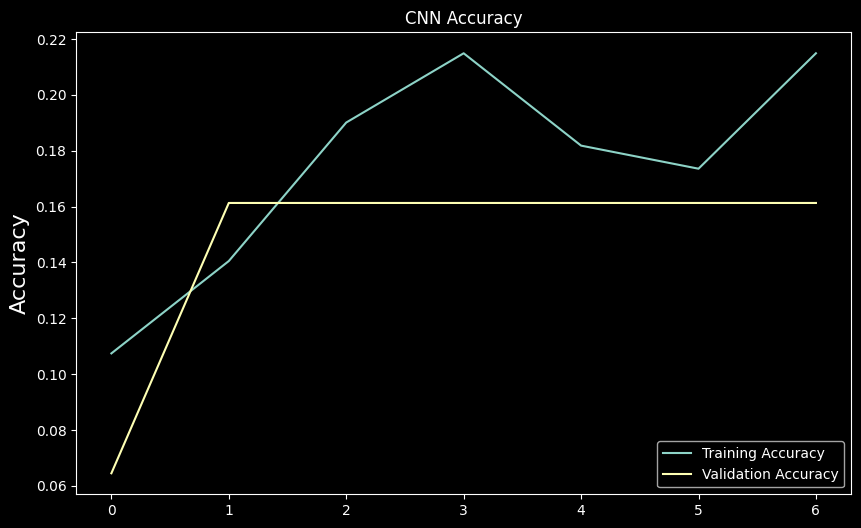

In [40]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "densenet121"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "densenet121_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "densenet121_Accuracy.png")
plt.show()


# densenet 201


In [41]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, AvgPool2D, GlobalAvgPool2D, Concatenate, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


def densenet201(img_shape, n_classes, f=32):
    repetitions = (6, 12, 48, 32)

    def bn_rl_conv(x, f, k=1, s=1, p="same"):
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(f, k, strides=s, padding=p, kernel_regularizer=l2(0.01))(x)
        return x

    def dense_block(tensor, r):
        for _ in range(r):
            x = bn_rl_conv(tensor, 4 * f)
            x = bn_rl_conv(x, f, 3)
            tensor = Concatenate()([tensor, x])
        return tensor

    def transition_block(x):
        if K.image_data_format() == 'channels_last':
            bn_axis = -1
        else:
            bn_axis = 1
        x = bn_rl_conv(x, K.int_shape(x)[bn_axis] // 2)
        x = BatchNormalization()(x)
        x = AvgPool2D(2, strides=2, padding="same")(x)
        return x

    input = Input(img_shape)
    x = Conv2D(64, 7, strides=2, padding="same", kernel_regularizer=l2(0.01))(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2, padding="same")(x)

    for r in repetitions:
        d = dense_block(x, r)
        x = transition_block(d)

    x = GlobalAvgPool2D()(d)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Add dropout layer
    output = Dense(n_classes, activation="softmax", kernel_regularizer=l2(0.01))(x)

    model = Model(input, output)
    return model

model = densenet201(input_shape, n_classes)
model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 156, 156, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_155 (Conv2D)           │ (None, 78, 78, 64)        │           9,472 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_148       │ (None, 78, 78, 64)        │             256 │ conv2d_155[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_13              │ (None, 39, 39, 64)        │               0 │ batch_normalization_148[0… │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_149       │ (None, 39, 39, 64)        │             256 │ max_pooling2d_13[0][0]     │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_120 (ReLU)              │ (None, 39, 39, 64)        │               0 │ batch_normalization_149[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_156 (Conv2D)           │ (None, 39, 39, 128)       │           8,320 │ re_lu_120[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_150       │ (None, 39, 39, 128)       │             512 │ conv2d_156[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_121 (ReLU)              │ (None, 39, 39, 128)       │               0 │ batch_normalization_150[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_157 (Conv2D)           │ (None, 39, 39, 32)        │          36,896 │ re_lu_121[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_58 (Concatenate)  │ (None, 39, 39, 96)        │               0 │ max_pooling2d_13[0][0],    │
│                               │                           │                 │ conv2d_157[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_151       │ (None, 39, 39, 96)        │             384 │ concatenate_58[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_122 (ReLU)              │ (None, 39, 39, 96)        │               0 │ batch_normalization_151[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_158 (Conv2D)           │ (None, 39, 39, 128)       │          12,416 │ re_lu_122[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 18,359,496 (70.04 MB)

 Trainable params: 18,127,880 (69.15 MB)

 Non-trainable params: 231,616 (904.75 KB)

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=validation_steps,
                    callbacks=callbacks_list
)

model.save(Path(os.getcwd()) / "model/densenet201"/ "densenet201_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "densenet201"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "densenet201_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "densenet201_Accuracy.png")
plt.show()


# Resnet 50

In [ ]:
def resnet50(input_shape, n_classes):
    def identity_block(input_tensor, filters):
        """Identity block"""
        filters1, filters2, filters3 = filters

        x = Conv2D(filters1, (1, 1), kernel_regularizer=l2(0.01))(input_tensor)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(filters2, (3, 3), padding='same', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(filters3, (1, 1), kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)

        x = Add()([x, input_tensor])
        x = Activation('relu')(x)

        return x

    def convolutional_block(input_tensor, filters, strides=(2, 2)):
        """Convolutional block"""
        filters1, filters2, filters3 = filters

        x = Conv2D(filters1, (1, 1), strides=strides, kernel_regularizer=l2(0.01))(input_tensor)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(filters2, (3, 3), padding='same', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(filters3, (1, 1), kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)

        shortcut = Conv2D(filters3, (1, 1), strides=strides, kernel_regularizer=l2(0.01))(input_tensor)
        shortcut = BatchNormalization()(shortcut)

        x = Add()([x, shortcut])
        x = Activation('relu')(x)

        return x

    input = Input(input_shape)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', kernel_regularizer=l2(0.01))(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D((3, 3), strides=(2, 2), padding='same')(x)

    x = convolutional_block(x, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, [64, 64, 256])
    x = identity_block(x, [64, 64, 256])

    x = convolutional_block(x, [128, 128, 512])
    x = identity_block(x, [128, 128, 512])
    x = identity_block(x, [128, 128, 512])
    x = identity_block(x, [128, 128, 512])

    x = convolutional_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])

    x = convolutional_block(x, [512, 512, 2048])
    x = identity_block(x, [512, 512, 2048])
    x = identity_block(x, [512, 512, 2048])

    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Add dropout layer
    x = Flatten()(x)
    output = Dense(n_classes, activation='softmax', kernel_regularizer=l2(0.01))(x)

    model = Model(input, output)
    return model

model = resnet50(input_shape, n_classes)
model.summary()

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=validation_steps,
                    callbacks=callbacks_list
)

model.save(Path(os.getcwd()) / "model/resnet50"/ "resnet50_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "resnet50"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "resnet50_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "resnet50_Accuracy.png")
plt.show()


In [ ]:
#inception


def googlenet(input_shape, n_classes):
    def inception_block(x, f):
        t1 = Conv2D(f[0], 1, activation="relu", kernel_regularizer=l2(0.01))(x)

        t2 = Conv2D(f[1], 1, activation="relu", kernel_regularizer=l2(0.01))(x)
        t2 = Conv2D(f[2], 3, padding="same", activation="relu", kernel_regularizer=l2(0.01))(t2)

        t3 = Conv2D(f[3], 1, activation="relu", kernel_regularizer=l2(0.01))(x)
        t3 = Conv2D(f[4], 5, padding="same", activation="relu", kernel_regularizer=l2(0.01))(t3)

        t4 = MaxPool2D(3, 1, padding="same")(x)
        t4 = Conv2D(f[5], 1, activation="relu", kernel_regularizer=l2(0.01))(t4)

        output = Concatenate()([t1, t2, t3, t4])
        output = BatchNormalization()(output)

        return output

    input = Input(input_shape)

    x = Conv2D(64, 7, strides=2, padding="same", activation="relu", kernel_regularizer=l2(0.01))(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2, padding="same")(x)

    x = Conv2D(64, 1, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Conv2D(192, 3, padding="same", activation="relu", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)

    x = inception_block(x, [64, 96, 128, 16, 32, 32])
    x = inception_block(x, [128, 128, 192, 32, 96, 64])
    x = MaxPool2D(3, strides=2, padding="same")(x)

    x = inception_block(x, [192, 96, 208, 16, 48, 64])
    x = inception_block(x, [160, 112, 224, 24, 64, 64])
    x = inception_block(x, [128, 128, 256, 24, 64, 64])
    x = inception_block(x, [112, 144, 288, 32, 64, 64])
    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = MaxPool2D(3, strides=2, padding="same")(x)

    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = inception_block(x, [384, 192, 384, 48, 128, 128])
    x = AvgPool2D(2, strides=1)(x)

    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Flatten()(x)
    output = Dense(n_classes, activation="softmax", kernel_regularizer=l2(0.01))(x)

    model = Model(input, output)
    return model

model = googlenet(input_shape, n_classes)
model.summary()

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=validation_steps,
                    callbacks=callbacks_list
)

model.save(Path(os.getcwd()) / "model/inception"/ "inception_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "inception"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "inception_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "inception_Accuracy.png")
plt.show()


In [ ]:
#mobilenet

def mobilenet(input_shape, n_classes):
    def mobilenet_block(x, f, s=1):
        x = DepthwiseConv2D(3, strides=s, padding="same", kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(f, 1, strides=1, padding="same", kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        return x

    input = Input(input_shape)
    x = Conv2D(32, 3, strides=2, padding="same", kernel_regularizer=l2(0.01))(input)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = mobilenet_block(x, 64)
    x = mobilenet_block(x, 128, 2)
    x = mobilenet_block(x, 128)
    x = mobilenet_block(x, 256, 2)
    x = mobilenet_block(x, 256)
    x = mobilenet_block(x, 512, 2)

    for _ in range(5):
        x = mobilenet_block(x, 512)

    x = mobilenet_block(x, 1024, 2)
    x = mobilenet_block(x, 1024)

    x = GlobalAvgPool2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Add dropout layer
    x = Dense(n_classes, activation="softmax", kernel_regularizer=l2(0.01))(x)

    model = Model(input, output)
    return model

model = mobilenet(input_shape, n_classes)
model.summary()

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=validation_steps,
                    callbacks=callbacks_list
)

model.save(Path(os.getcwd()) / "model/mobilenet"/ "mobilenet_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "mobilenet"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "mobilenet_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "mobilenet_Accuracy.png")
plt.show()


In [ ]:
#xception

def xception(input_shape, n_classes):
    def conv_bn(x, f, k, s=1, p="same"):
        x = Conv2D(f, k, strides=s, padding=p, use_bias=False, kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        return x

    def sep_bn(x, f, k, s=1, p="same"):
        x = SeparableConv2D(f, k, strides=s, padding=p, use_bias=False, kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        return x

    def entry_flow(x):
        x = conv_bn(x, 32, 3, 2)
        x = ReLU()(x)
        x = conv_bn(x, 64, 3)
        tensor = ReLU()(x)
        x = sep_bn(tensor, 128, 3)
        x = ReLU()(x)
        x = sep_bn(x, 128, 3)
        x = MaxPool2D(3, strides=2, padding="same")(x)
        tensor = conv_bn(tensor, 128, 1, 2)
        x = Add()([tensor, x])
        x = ReLU()(x)
        x = sep_bn(x, 256, 3)
        x = ReLU()(x)
        x = sep_bn(x, 256, 3)
        x = MaxPool2D(3, strides=2, padding="same")(x)
        tensor = conv_bn(tensor, 256, 1, 2)
        x = Add()([tensor, x])
        x = ReLU()(x)
        x = sep_bn(x, 728, 3)
        x = ReLU()(x)
        x = sep_bn(x, 728, 3)
        x = MaxPool2D(3, strides=2, padding="same")(x)
        tensor = conv_bn(tensor, 728, 1, 2)
        x = Add()([tensor, x])
        return x

    def middle_flow(tensor):
        for _ in range(8):
            x = ReLU()(tensor)
            x = sep_bn(x, 728, 3)
            x = ReLU()(x)
            x = sep_bn(x, 728, 3)
            x = ReLU()(x)
            x = sep_bn(x, 728, 3)
            tensor = Add()([tensor, x])
        return tensor

    def exit_flow(tensor):
        x = ReLU()(tensor)
        x = sep_bn(x, 728, 3)
        x = ReLU()(x)
        x = sep_bn(x, 1024, 3)
        x = MaxPool2D(3, strides=2, padding="same")(x)
        tensor = conv_bn(tensor, 1024, 1, 2)
        x = Add()([tensor, x])
        x = sep_bn(x, 1536, 3)
        x = ReLU()(x)
        x = sep_bn(x, 2048, 3)
        x = ReLU()(x)
        x = GlobalAvgPool2D()(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)  # Add dropout layer
        x = Dense(n_classes, activation="softmax", kernel_regularizer=l2(0.01))(x)
        return x

    input = Input(input_shape)
    x = entry_flow(input)
    x = middle_flow(x)
    output = exit_flow(x)

    model = Model(input, output)
    return model

model = xception(input_shape, n_classes)
model.summary()

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=validation_steps,
                    callbacks=callbacks_list
)

model.save(Path(os.getcwd()) / "model/xception"/ "xception_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "xception"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "xception_loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "xception_Accuracy.png")
plt.show()


In [ ]:
#yolo

def yolo(input_shape=(448, 448, 3), n_outputs=30):
    activation = LeakyReLU(0.1)

    def conv_1_3(x, f1, f2, r=1):
        for _ in range(r):
            x = Conv2D(f1, 1, padding="same", activation=activation, kernel_regularizer=l2(0.01))(x)
            x = BatchNormalization()(x)
            x = Conv2D(f2, 3, padding="same", activation=activation, kernel_regularizer=l2(0.01))(x)
            x = BatchNormalization()(x)
        return x

    input = Input(input_shape)
    x = Conv2D(64, 7, strides=2, padding="same", activation=activation, kernel_regularizer=l2(0.01))(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)
    x = Conv2D(192, 3, padding="same", activation=activation, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)
    x = conv_1_3(x, 128, 256)
    x = conv_1_3(x, 256, 512)
    x = MaxPool2D(2, strides=2, padding="same")(x)
    x = conv_1_3(x, 256, 512, 4)
    x = conv_1_3(x, 512, 1024)
    x = MaxPool2D(2, strides=2, padding="same")(x)
    x = conv_1_3(x, 512, 1024, 2)
    x = Conv2D(1024, 3, padding="same", activation=activation, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Conv2D(1024, 3, strides=2, padding="same", activation=activation, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Conv2D(1024, 3, padding="same", activation=activation, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Conv2D(1024, 3, padding="same", activation=activation, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dense(4096, activation=activation, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Add dropout layer
    x = Flatten()(x)  # Flatten the output
    output = Dense(n_outputs, kernel_regularizer=l2(0.01))(x)

    model = Model(input, output)
    return model

model = yolo(input_shape, n_classes)
model.summary()


In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=validation_steps,
                    callbacks=callbacks_list
)

model.save(Path(os.getcwd()) / "model/yolo"/ "yolo_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "yolo"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "yolo_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "yolo_Accuracy.png")
plt.show()
